In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
try:
    import xlwt
    has_xlwt = True
except ImportError:
    has_xlwt = False
%matplotlib inline 
from IPython.display import Image
import os
import sys
import sys
import math 
import statistics

# I. Plot site-means of the sills (n=18) in geographic/sedimentary coordinates

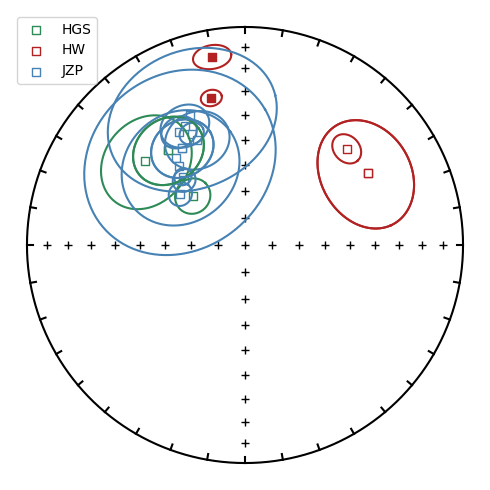

In [54]:
# The all 18 site means in geographic coordinates
di_block=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g)_with_beddings.csv',header=0)
plt.figure(num=1,figsize=(5,5),dpi=100)
ipmag.plot_net(1)
dot_size=30

color_HGS = 'seagreen'
color_HW = 'firebrick'
color_JZP = 'steelblue'

for i in range(len(di_block)):
    ipmag.plot_di_mean(dec=di_block.loc[i,'Dg'],inc=di_block.loc[i,'Ig'],a95=di_block.loc[i,'a95'],marker='s',color=di_block.loc[i,'Color_code'],markersize=dot_size ,legend="no")

ipmag.plot_di_mean(dec=di_block.loc[1,'Dg'],inc=di_block.loc[1,'Ig'],a95=di_block.loc[1,'a95'],marker='s',color=di_block.loc[1,'Color_code'],markersize=dot_size ,label= di_block.loc[1,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[5,'Dg'],inc=di_block.loc[5,'Ig'],a95=di_block.loc[5,'a95'],marker='s',color=di_block.loc[5,'Color_code'],markersize=dot_size ,label= di_block.loc[5,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[9,'Dg'],inc=di_block.loc[9,'Ig'],a95=di_block.loc[9,'a95'],marker='s',color=di_block.loc[9,'Color_code'],markersize=dot_size ,label= di_block.loc[9,'Section'],legend="yes")

{'dec': 350.76339701534465, 'inc': -42.89695097469337, 'n': 18, 'r': 17.54338188629814, 'k': 37.23023570435882, 'alpha95': 5.74089958541446, 'csd': 13.275079359456841}


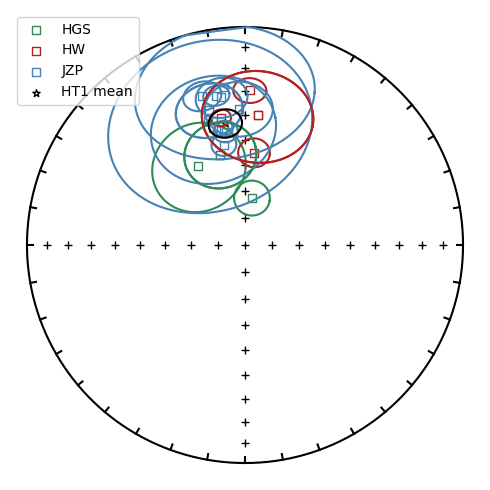

In [60]:
# The all 18 site means in sedimentary coordinates
di_block=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (s)_with_beddings.csv',header=0)
plt.figure(num=1,figsize=(5,5),dpi=100)
ipmag.plot_net(1)
dot_size=30

di_block_mean=ipmag.fisher_mean(di_block=di_block.loc[:,['Ds','Is']])

print(di_block_mean)

for i in range(len(di_block)):
    ipmag.plot_di_mean(dec=di_block.loc[i,'Ds'],inc=di_block.loc[i,'Is'],a95=di_block.loc[i,'a95'],marker='s',color=di_block.loc[i,'Color_code'],markersize=dot_size ,legend="no")

ipmag.plot_di_mean(dec=di_block.loc[1,'Ds'],inc=di_block.loc[1,'Is'],a95=di_block.loc[1,'a95'],marker='s',color=di_block.loc[1,'Color_code'],markersize=dot_size ,label= di_block.loc[1,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[5,'Ds'],inc=di_block.loc[5,'Is'],a95=di_block.loc[5,'a95'],marker='s',color=di_block.loc[5,'Color_code'],markersize=dot_size ,label= di_block.loc[5,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[9,'Ds'],inc=di_block.loc[9,'Is'],a95=di_block.loc[9,'a95'],marker='s',color=di_block.loc[9,'Color_code'],markersize=dot_size ,label= di_block.loc[9,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block_mean['dec'],inc=di_block_mean['inc'],a95=di_block_mean['alpha95'],marker='*',color='black',markersize=dot_size ,label='HT1 mean',legend="yes")

# II. Demonstrate the baked-zone test in geographic coordinates

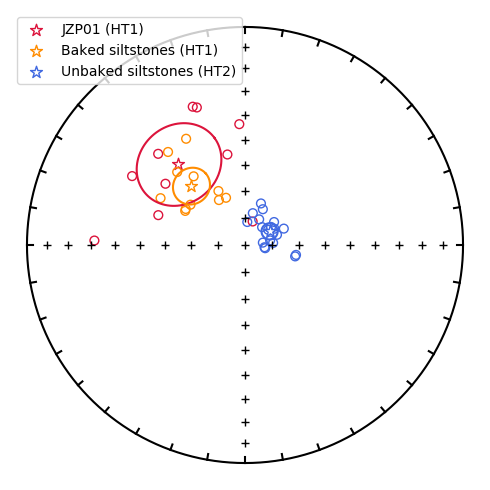

In [3]:
fignum = 1

di_block1=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Baked/csv/Baked.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

di_block2=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/JZP01/csv/JZP01_text.txt')
mode_2_fpars=ipmag.fisher_mean(di_block=di_block2)

di_block3=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Unbaked/csv/Unbaked.txt')
mode_3_fpars=ipmag.fisher_mean(di_block=di_block3)

plt.figure(num=1,figsize=(5,5),dpi=100)
ipmag.plot_net(1)

ipmag.plot_di(markersize=40,di_block=di_block2,color='crimson',edge='black')
ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='crimson',markersize=80,label='JZP01 (HT1)',legend="yes")

ipmag.plot_di(markersize=40,di_block=di_block1,color='darkorange',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='darkorange',markersize=80,label='Baked siltstones (HT1)',legend="yes")

ipmag.plot_di(markersize=40,di_block=di_block3,color='royalblue',edge='black')
ipmag.plot_di_mean(dec=mode_3_fpars['dec'],inc=mode_3_fpars['inc'],a95=mode_3_fpars['alpha95'],\
                  marker='*',color='royalblue',markersize=80,label='Unbaked siltstones (HT2)',legend="yes")

Results of Watson V test: 

Watson's V:           2.5
Critical value of V:  6.8
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 10.0
Critical angle for M&M1990:   16.7
The McFadden and McElhinny (1990) classification for
this test is: 'C'


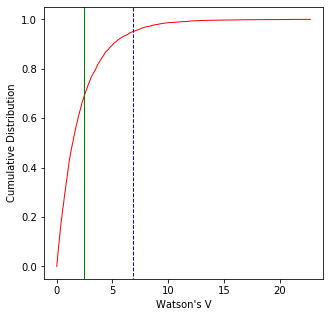

<Figure size 252x180 with 0 Axes>

In [57]:
# Watson_V test for the Baked-zone test
plot = plt.figure(1,(5,5))
results = ipmag.common_mean_watson(di_block1,di_block2,plot='yes')

# III. Fold test on the 18 site-means of the sills

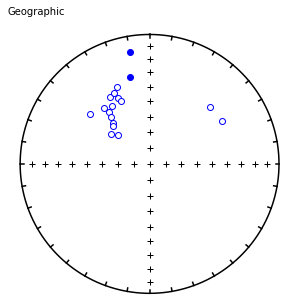

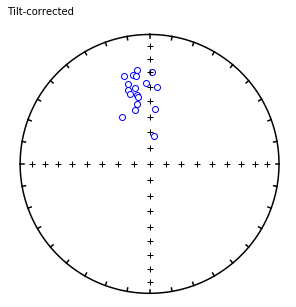

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
71 - 109 percent unfolding
range of all bootstrap samples: 
-10  -  119 percent unfolding


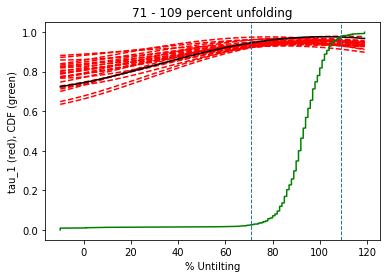

In [43]:
# Fold test for all 18 site-mean directions
data=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g)_with_beddings.txt')
ipmag.bootstrap_fold_test(data, num_sims=1000,save=False, save_folder='/Users/hairuo/Desktop/', fmt='pdf', ninety_nine=False)

# IV. Step-unfolding test on the 18 site-means

In [6]:
# Function for the step-unfolding test

def step_unfolding (direction='',xrange=[0,1.5,0.05],pty='go'):

    # Input: (1) direction = the path of the txt file (!!! must be the path);
    
    #        Optional: (2) xrange = [min,max,by]; default is [0,1.51,0.05]
    #                  (3) pty = ''; default is 'go'             
    
    # Creat a new table which has the same data structure as the original data
    
    # Creat steps of the step-unfolding: arange(min, max, by)
    step=np.arange(xrange[0],xrange[1]+xrange[2],xrange[2])
    
    # Get the length of the step, which can be used further
    length=len(step)
    
    # Creat "results" to store the 'k' values. The length of it is determined by the length of the step)
    results=list(range(0,length))
    
    # Creat "Order" to help storing data into "results"
    order=list(range(0,length))
    
    # The For Loop to do the progressisve unfolding
    for i in range(0,length):    
        di_block1=np.loadtxt(direction)
        # Have to read the original data again... Need to fix it later
        di_block1[:,3] = step[i]*di_block1[:,3]
        di_block2=pmag.dotilt_V(di_block1)
        di_block_mean1=ipmag.fisher_mean(di_block=np.column_stack(di_block2))
        results[order[i]] = di_block_mean1['k']
             
    # Now the "k" data is all saved in "results"   
    
    # Plot the results 
    plt.plot(step*100,results,pty,step*100,results,'k')
    plt.xlabel('Percentage of unfolding (%)')
    plt.ylabel('Precision parameter (k)')
    plt.grid(True)  
    
    return ()

Maximum K reaches at 92% unfolding


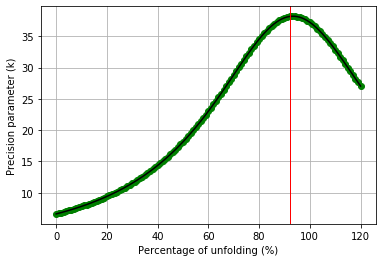

In [7]:
# step-unfolding test for all the 18 site means
step_unfolding(direction='/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g)_with_beddings.txt',xrange=[0,1.2,0.01])

vline = plt.axvline(x=92,linewidth=1, color='r')

print('Maximum K reaches at 92% unfolding')

## V. Comparing the means calculated from sites (N=18) and samples (N=125), sedimentary coordinates 
## -- not significantly different

In [37]:
# The mean of HT1 of all sites (n=18), sedimentary coordinates 
data=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (s)_with_beddings.csv',header=0)
ipmag.fisher_mean(di_block = data.loc[:,['Ds','Is']])

{'dec': 350.76339701534465,
 'inc': -42.89695097469337,
 'n': 18,
 'r': 17.54338188629814,
 'k': 37.23023570435882,
 'alpha95': 5.74089958541446,
 'csd': 13.275079359456841}

In [31]:
# The mean of HT1 of all samples (n=125), sedimentary coordinates 
data=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary/n125_sample (s).txt')
ipmag.fisher_mean(di_block = data[:,(0,1)])

{'dec': 350.3758629088815,
 'inc': -44.08212504774035,
 'n': 125,
 'r': 118.71217083653804,
 'k': 19.720637564479862,
 'alpha95': 2.9164614621192135,
 'csd': 18.239987784171497}

## VI. Comparing the paleomagnetic poles calculated from VGP-sites (N=18) and VGP-samples (N=125) 
## -- not significantly different

In [63]:
# Paleomagnetic pole calculated using VGPS of sites (N=18)
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is.txt') 
ipmag.fisher_mean(di_block=vgp[:,(0,1)])

{'dec': 298.7955651799714,
 'inc': 35.331017985776235,
 'n': 18,
 'r': 17.543571555645336,
 'k': 37.245706770172916,
 'alpha95': 5.739675087128395,
 'csd': 13.2723219818116}

In [62]:
# Paleomagnetic pole calculated using VGPS of samples (N=125)
data=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary/VGPs/125 samples_Vgps.txt')
ipmag.fisher_mean(di_block=data)

{'dec': 298.6039198001413,
 'inc': 33.48558476766244,
 'n': 125,
 'r': 117.76456980449446,
 'k': 17.13788906111284,
 'alpha95': 3.1411295966449395,
 'csd': 19.566194000958905}

# VII. Paleosecular variation test -- A95 method (Deenen et al. 2011)

### Calculate the critical values for A95 at the site level (N=18)

In [74]:
N=18
A95min=12*(N)**(-0.4)
A95max=82*(N)**(-0.63)
A95_critical_values = [A95min,A95max]
print("A95 critical values (n=18) is --", A95_critical_values)
print('Our A95 = 5.7 (n=18) passes the test!')

A95 critical values (n=18) is -- [3.7763500451796075, 13.273705387714697]
Our A95 = 5.7 (n=18) passes the test!


### Calculate the critical values for A95 at the sample level (N=125)

In [9]:
N=125
A95min=12*(N)**(-0.4)
A95max=82*(N)**(-0.63)
A95_critical_values = [A95min,A95max]
print("A95 critical values (n=125) is --", A95_critical_values)
print('Our A95 = 3.1 (n=125) passes the test')

A95 critical values (n=125) is -- [1.739471192826469, 3.915259429497095]
Our A95 = 3.1 (n=125) passes the test


# VIII. Paleosecular variation test -- VGP scatter method (Doell 1970)

### ST for VGPs (N=18)

In [83]:
# The input text should contain 5 columns -- 1.VGP_long 2.VGP_lat 3.k (precision parameter) 4.n (sample numbber for each VGP) 5.Inclination for each VGP 
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is.txt') 
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])
summ=0
for i in range(0,len(vgp)):
    summ=summ+(pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2/(len(vgp)-1)
ST = math.sqrt(summ)
print('ST =',ST)

ST = 13.37206981962723


### SB for VGPs (N=18)

In [84]:
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is.txt')
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])

plat_calc=pmag.plat(vgp[:,4])
summ=0

for i in range(0,len(vgp)):
    K=vgp[i,2]*(((1/8)*(5+18*((math.sin(math.pi*plat_calc[i]/180))**2)+9*((math.sin(math.pi*plat_calc[i]/180))**4)))**(-1))
    SW=81/((K)**(1/2))
    summm=((pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2)-(SW**(2)/vgp[i,3])
    summ=summ+summm
    
SB=(summ/(len(vgp)-1))**(1/2)
print('SB =',SB)

SB = [11.70808917]


### Calculate the expected S values in model-G (Veikko 2014)

In [8]:
bmin=10.07-0.54
bmax=10.07+0.54
amin=0.26-0.04
amax=0.26+0.04

plat=-24.91859562786275 # calculate using (Is = -42.896) of the mean of the 18 sites

Smin=(((amin*plat)**2)+bmin**2)**(1/2)
Smax=(((amax*plat)**2)+bmax**2)**(1/2)

S_range = [Smin,Smax]

print('Expected S =',S_range)
print("Our SB = 11.7 (N=18) falls right in the expected range")

Expected S = [10.994281338511541, 12.97907457124138]
Our SB = 11.7 (N=18) falls right in the expected range


### (n-1) Jack Knief Method to calculate 95% CI for SB

In [3]:
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is.txt')

SB=list(range(0,len(vgp)))

for k in range(0,len(vgp)):
    vgp_JN=np.delete(vgp,k,0)
    mean_vgp,r=pmag.vector_mean(vgp_JN[:,(0,1)])
    plat_calc=pmag.plat(vgp_JN[:,4])
    summ=0
    
    for i in range(0,len(vgp_JN)):
        K=vgp_JN[i,2]*(((1/8)*(5+18*(math.sin(math.pi*plat_calc[i]/180)**2)+9*(math.sin(math.pi*plat_calc[i]/180)**4)))**(-1))
        SW=81/((K)**(1/2))
        summm=((pmag.angle(mean_vgp[0:2],vgp_JN[i,[0,1]]))**2)-(SW**(2)/vgp_JN[i,3])
        summ=summ+summm
        
    SB[k]=(summ/(len(vgp_JN)-1))**(1/2)

# calculate the 95% CI for JN data
mean_SB=np.mean(SB)
SB_var=len(vgp_JN)*np.var(SB,ddof=0)

SB_CI = [mean_SB-1.96*((SB_var)**(1/2)), mean_SB+1.96*((SB_var)**(1/2))]

print('95% CI of SB =',SB_CI)

95% CI of SB = [5.057607270220064, 18.288436204038515]
